### Objective: The Goal is to predict the average flight fare using the provided input variables and a multi-linear regression model.

### Q1. Reading Source File and Checking Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# to use unverified ssl
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
# reading source file
data= pd.read_csv("http://users.stat.ufl.edu/~winner/data/airq402.dat", sep = '\s+', engine = 'python', header = None)

In [4]:
# Adding colunm names as mentioned in data file
data.columns = ['City1', 'City2', 'Average Flight Fare', 'Distance','Average Weekly Passengers',
                'Market Leading Airline (MLA)','Market Share MLA', 'Average MLA Fare', 
                'Low Price Airline (LPA)', 'Market Share LPA', 'Average LPA Fare']

In [5]:
data.head()

,City1,City2,Average Flight Fare,Distance,Average Weekly Passengers,Market Leading Airline (MLA),Market Share MLA,Average MLA Fare,Low Price Airline (LPA),Market Share LPA,Average LPA Fare
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


### Q2. Check the first few samples, shape, info of the data

In [6]:
data.sample(5)

,City1,City2,Average Flight Fare,Distance,Average Weekly Passengers,Market Leading Airline (MLA),Market Share MLA,Average MLA Fare,Low Price Airline (LPA),Market Share LPA,Average LPA Fare
874,ONT,SLC,107.83,558,356.19,DL,69.57,105.10,DL,69.57,105.10
186,BOS,CMH,185.06,640,307.93,HP,57.99,182.51,HP,57.99,182.51
49,ATL,IAH,136.03,696,1453.04,DL,52.49,139.61,FL,14.38,118.58
60,ATL,BNA,209.89,214,220.21,DL,91.06,211.42,AX,7.79,194.47
237,BUR,SJC,80.67,296,1129.23,WN,99.96,80.67,WN,99.96,80.67


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   City1                         1000 non-null   object 
 1   City2                         1000 non-null   object 
 2   Average Flight Fare           1000 non-null   float64
 3   Distance                      1000 non-null   int64  
 4   Average Weekly Passengers     1000 non-null   float64
 5   Market Leading Airline (MLA)  1000 non-null   object 
 6   Market Share MLA              1000 non-null   float64
 7   Average MLA Fare              1000 non-null   float64
 8   Low Price Airline (LPA)       1000 non-null   object 
 9   Market Share LPA              1000 non-null   float64
 10  Average LPA Fare              1000 non-null   float64
dtypes: float64(6), int64(1), object(4)
memory usage: 86.1+ KB


In [8]:
print(f" Shape of the dataframe = {data.shape}")
totalrows = data.shape[0]
print(f" Total number of rows in the dataset =  {totalrows}")

 Shape of the dataframe = (1000, 11)
 Total number of rows in the dataset =  1000


### Q3. Data Cleaning

In [9]:
# Check for duplicate records
len(data[data.duplicated()])

0

In [10]:
# Checking Null colunms
data_nullcols = data.isnull().sum()
data_nullcols

City1                           0
City2                           0
Average Flight Fare             0
Distance                        0
Average Weekly Passengers       0
Market Leading Airline (MLA)    0
Market Share MLA                0
Average MLA Fare                0
Low Price Airline (LPA)         0
Market Share LPA                0
Average LPA Fare                0
dtype: int64

In [11]:
# Checking data type of each colunm to check if any type needs to be changed
data.dtypes

City1                            object
City2                            object
Average Flight Fare             float64
Distance                          int64
Average Weekly Passengers       float64
Market Leading Airline (MLA)     object
Market Share MLA                float64
Average MLA Fare                float64
Low Price Airline (LPA)          object
Market Share LPA                float64
Average LPA Fare                float64
dtype: object

In [12]:
# Checking basic details of the data
data.describe()

,Average Flight Fare,Distance,Average Weekly Passengers,Market Share MLA,Average MLA Fare,Market Share LPA,Average LPA Fare
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,163.37542,1056.973000,672.279140,60.128590,166.64756,34.551480,143.193090
std,55.36547,643.203251,766.519254,19.367779,62.66014,27.096999,47.229184
min,50.52000,108.000000,181.410000,17.680000,50.52000,1.060000,49.610000
25%,125.97500,553.500000,257.197500,46.510000,124.08500,13.195000,113.767500
50%,161.34500,919.000000,404.780000,59.240000,161.40000,26.140000,137.825000
75%,197.39250,1452.500000,769.912500,73.510000,202.97750,52.972500,168.530000
max,401.23000,2724.000000,8950.760000,100.000000,490.03000,100.000000,387.940000


### 4. Exploratory Data Analysis

### Q4. Univariate Analysis

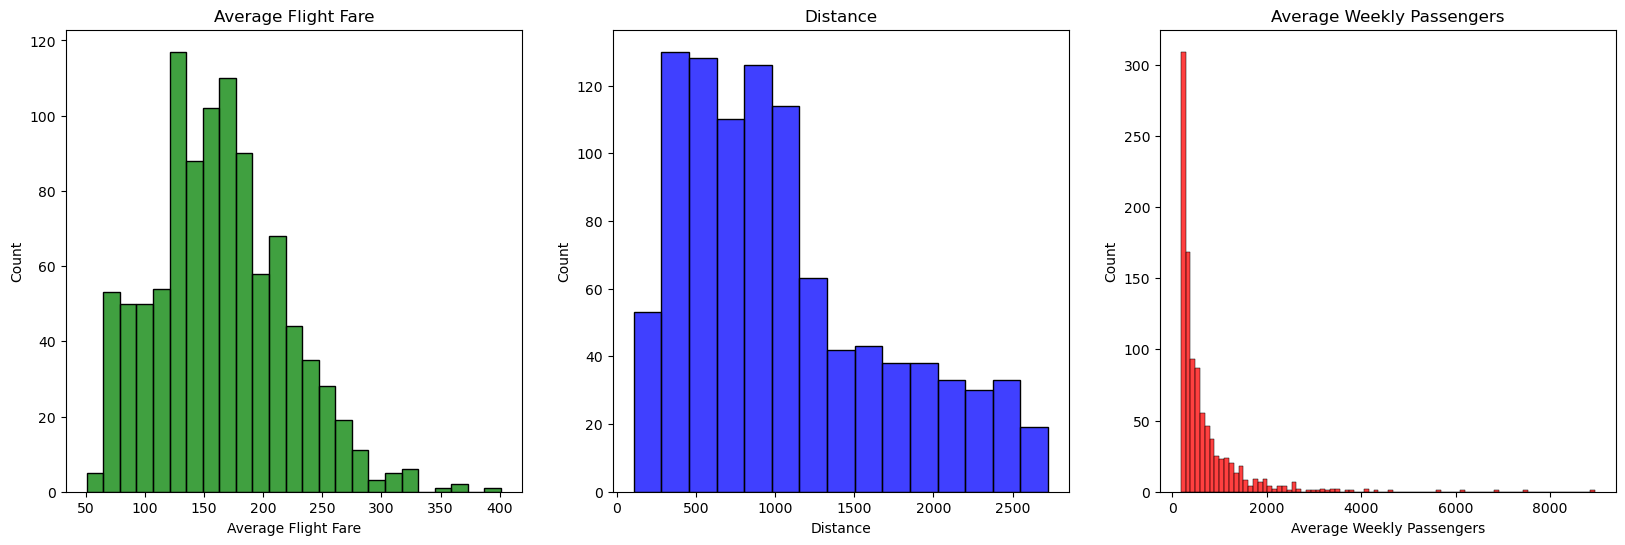

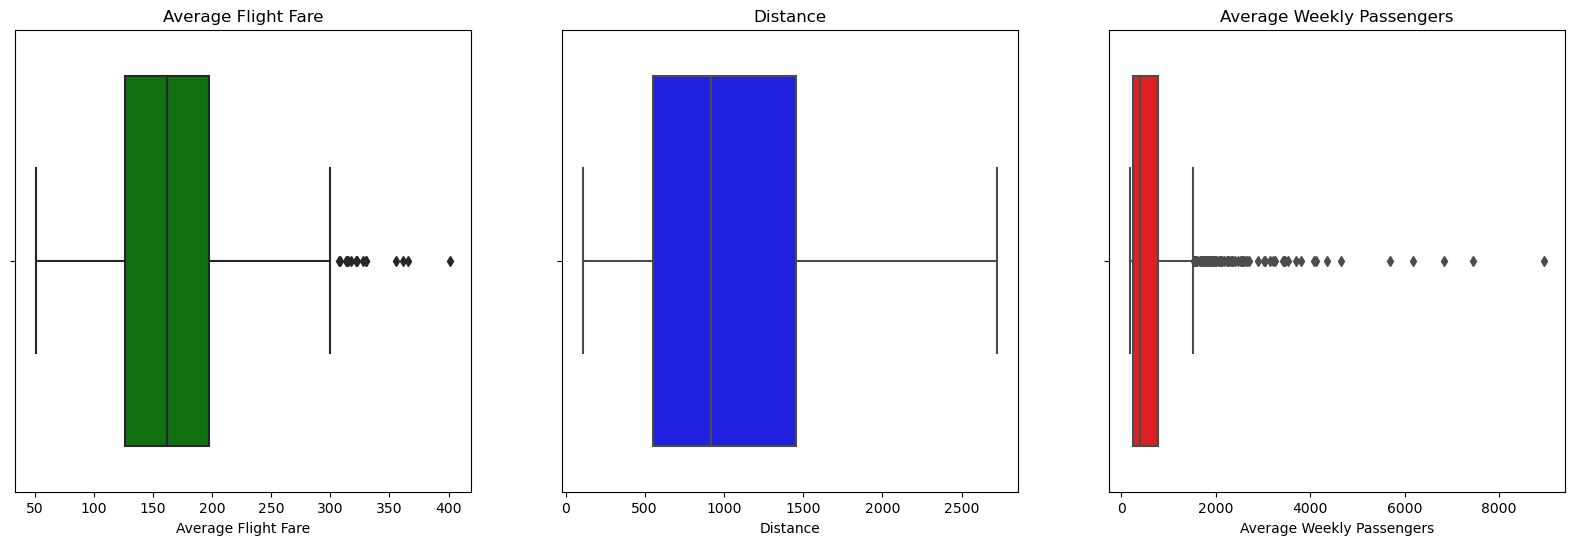

In [13]:
plt.figure(figsize = (20,6))
plt.subplot(1, 3, 1)
plt.title('Average Flight Fare')
sns.histplot(data = data, x = 'Average Flight Fare', color = 'green')

# subplot 2
plt.subplot(1, 3, 2)
plt.title('Distance')
sns.histplot(data = data, x = 'Distance', color = 'blue')

# subplot 3l
plt.subplot(1, 3, 3)
plt.title('Average Weekly Passengers')
sns.histplot(data = data, x = 'Average Weekly Passengers', color = 'red')

plt.figure(figsize = (20,6))
plt.subplot(1, 3, 1)
plt.title('Average Flight Fare')
sns.boxplot(data = data, x = 'Average Flight Fare', color = 'green')

# subplot 2
plt.subplot(1, 3, 2)
plt.title('Distance')
sns.boxplot(data = data, x = 'Distance', color = 'blue')

# subplot 3
plt.subplot(1, 3, 3)
plt.title('Average Weekly Passengers')
sns.boxplot(data = data, x = 'Average Weekly Passengers', color = 'red')
plt.show()

### Inference:

- The majority of flight fares fall within the range of 100 to 300, exhibiting a few exceptions.
- The average distance spans from 500 to 2500.
- Generally, the Average Weekly Passenger number is below 2000; however, numerous outliers exist.

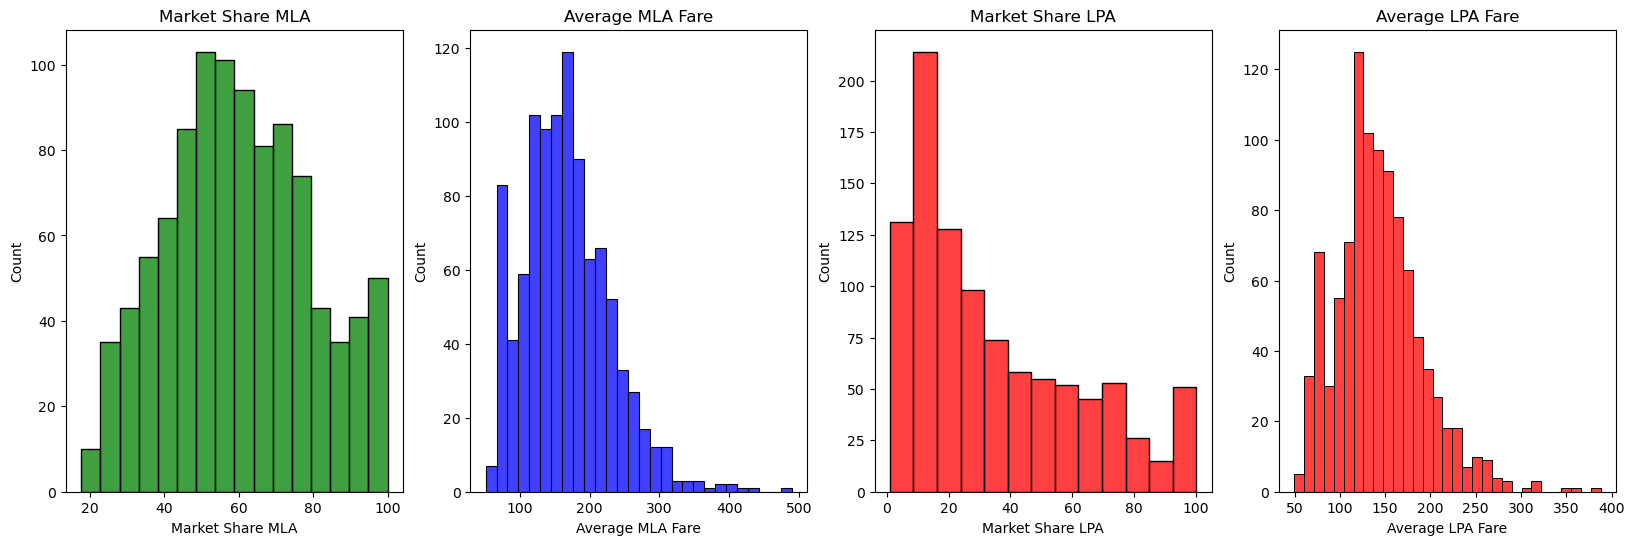

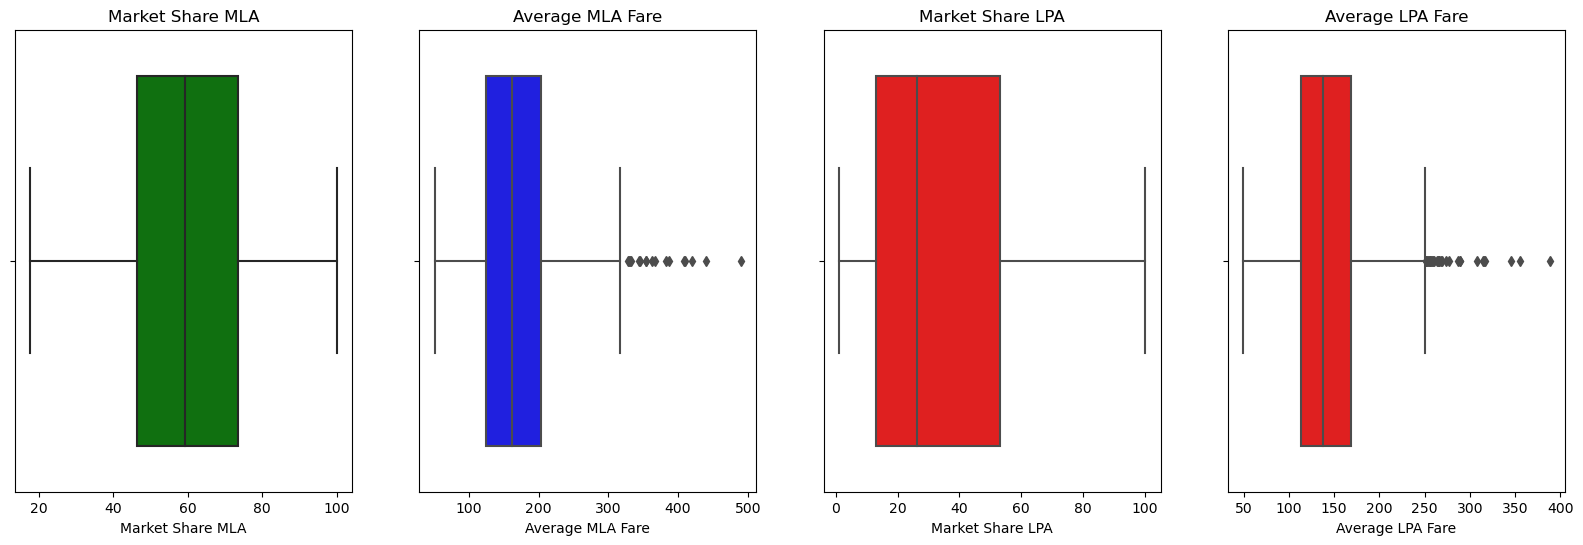

In [14]:
plt.figure(figsize=(20,6))
plt.subplot(1, 4, 1)
plt.title('Market Share MLA')
sns.histplot(data = data, x = 'Market Share MLA', color = 'green')

# subplot 2
plt.subplot(1, 4, 2)
plt.title('Average MLA Fare')
sns.histplot(data = data, x = 'Average MLA Fare', color = 'blue')

# subplot 3
plt.subplot(1, 4, 3)
plt.title('Market Share LPA')
sns.histplot(data = data, x = 'Market Share LPA', color = 'red')

# subplot 4
plt.subplot(1, 4, 4)
plt.title('Average LPA Fare')
sns.histplot(data = data, x = 'Average LPA Fare', color ='red')


plt.figure(figsize = (20,6))
plt.subplot(1, 4, 1)
plt.title('Market Share MLA')
sns.boxplot(data = data, x = 'Market Share MLA', color = 'green')

# subplot 2
plt.subplot(1, 4, 2)
plt.title('Average MLA Fare')
sns.boxplot(data = data, x = 'Average MLA Fare', color ='blue')

# subplot 3
plt.subplot(1, 4, 3)
plt.title('Market Share LPA')
sns.boxplot(data = data, x = 'Market Share LPA', color ='red')

# subplot 4
plt.subplot(1, 4, 4)
plt.title('Average LPA Fare')
sns.boxplot(data = data, x = 'Average LPA Fare', color ='red')
plt.show()

### Inference:
- The mean fare for both the Market Leader and the Low Price Airline varies between 100 and 300, featuring a few exceptional cases. The Market Leader captures a market share of 40 to 80 percent on the majority of routes, while the Low Price Airline holds less than 40 percent market share on most routes.

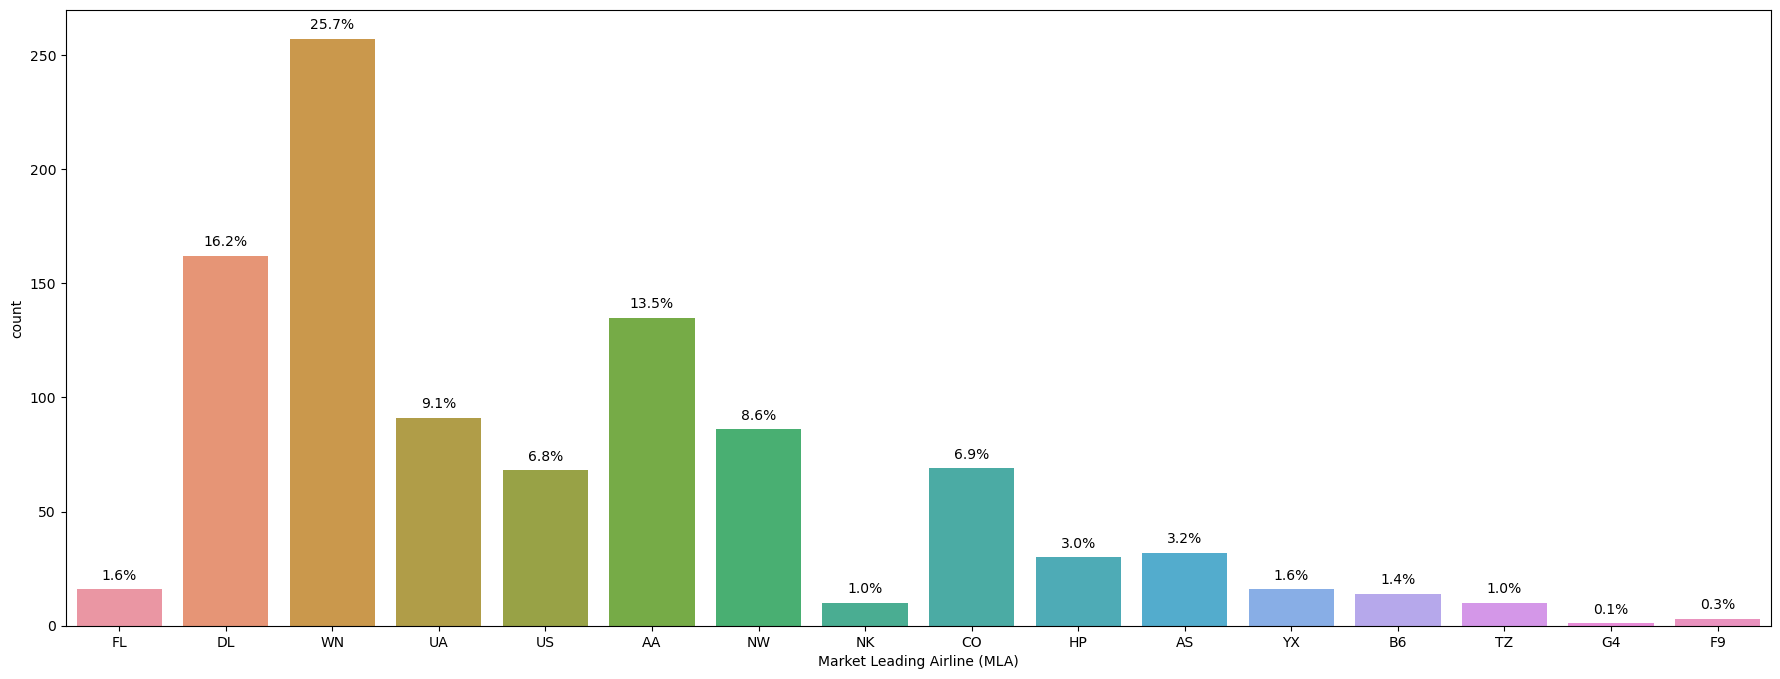

In [15]:
fig, ax = plt.subplots(figsize = (20,8))
width = len(data['Market Leading Airline (MLA)'].unique()) + 6
fig.set_size_inches(width , 8)
ax=sns.countplot(data = data, x = 'Market Leading Airline (MLA)') 

for p in ax.patches: 
    ax.annotate(str((np.round(p.get_height()/len(data)*100, decimals = 2))) + '%', (p.get_x() + p.get_width()/2., p.get_height()), ha = 'center', 
                va = 'center', xytext = (0, 10), textcoords = 'offset points')

- WN followed by DL happens to be market leader airline on most of the routes.

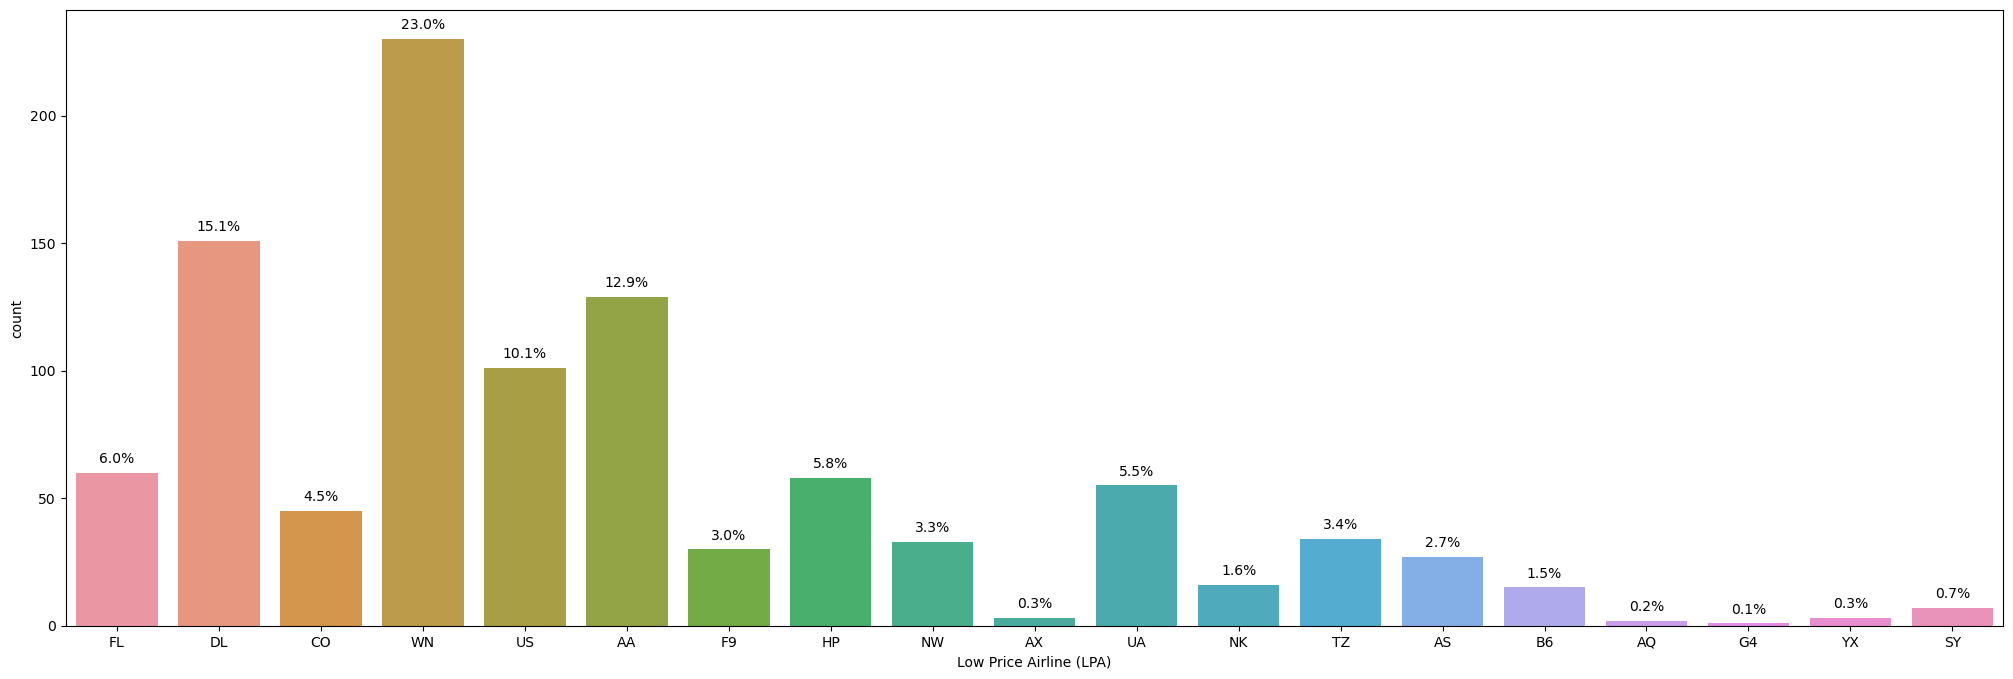

In [16]:
fig, ax = plt.subplots(figsize = (20,8))
width = len(data['Low Price Airline (LPA)'].unique()) + 6
fig.set_size_inches(width , 8)
ax=sns.countplot(data = data, x = 'Low Price Airline (LPA)') 

for p in ax.patches: 
    ax.annotate(str((np.round(p.get_height()/len(data)*100, decimals=2)))+'%', (p.get_x()+p.get_width()/2., p.get_height()), ha = 'center', 
                va = 'center', xytext=(0, 10), textcoords = 'offset points')

- WN followed by DL happens to be the low price airline on most routes.

### Q4.1 Bivariate Analysis

In [17]:
# Correlation Coefficient
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = data.corr()
corr.style.background_gradient(cmap = 'coolwarm')

,Average Flight Fare,Distance,Average Weekly Passengers,Market Share MLA,Average MLA Fare,Market Share LPA,Average LPA Fare
Average Flight Fare,1.000000,0.587169,-0.126175,-0.234142,0.981462,-0.458660,0.866410
Distance,0.587169,1.000000,-0.090131,-0.531406,0.564082,-0.367831,0.583239
Average Weekly Passengers,-0.126175,-0.090131,1.000000,-0.067605,-0.100946,0.034241,-0.142314
Market Share MLA,-0.234142,-0.531406,-0.067605,1.000000,-0.220801,0.306832,-0.307672
Average MLA Fare,0.981462,0.564082,-0.100946,-0.220801,1.000000,-0.472838,0.826511
Market Share LPA,-0.458660,-0.367831,0.034241,0.306832,-0.472838,1.000000,-0.240186
Average LPA Fare,0.866410,0.583239,-0.142314,-0.307672,0.826511,-0.240186,1.000000


- Average Flight fare is most correlated to fare of market leader and low performing flight.

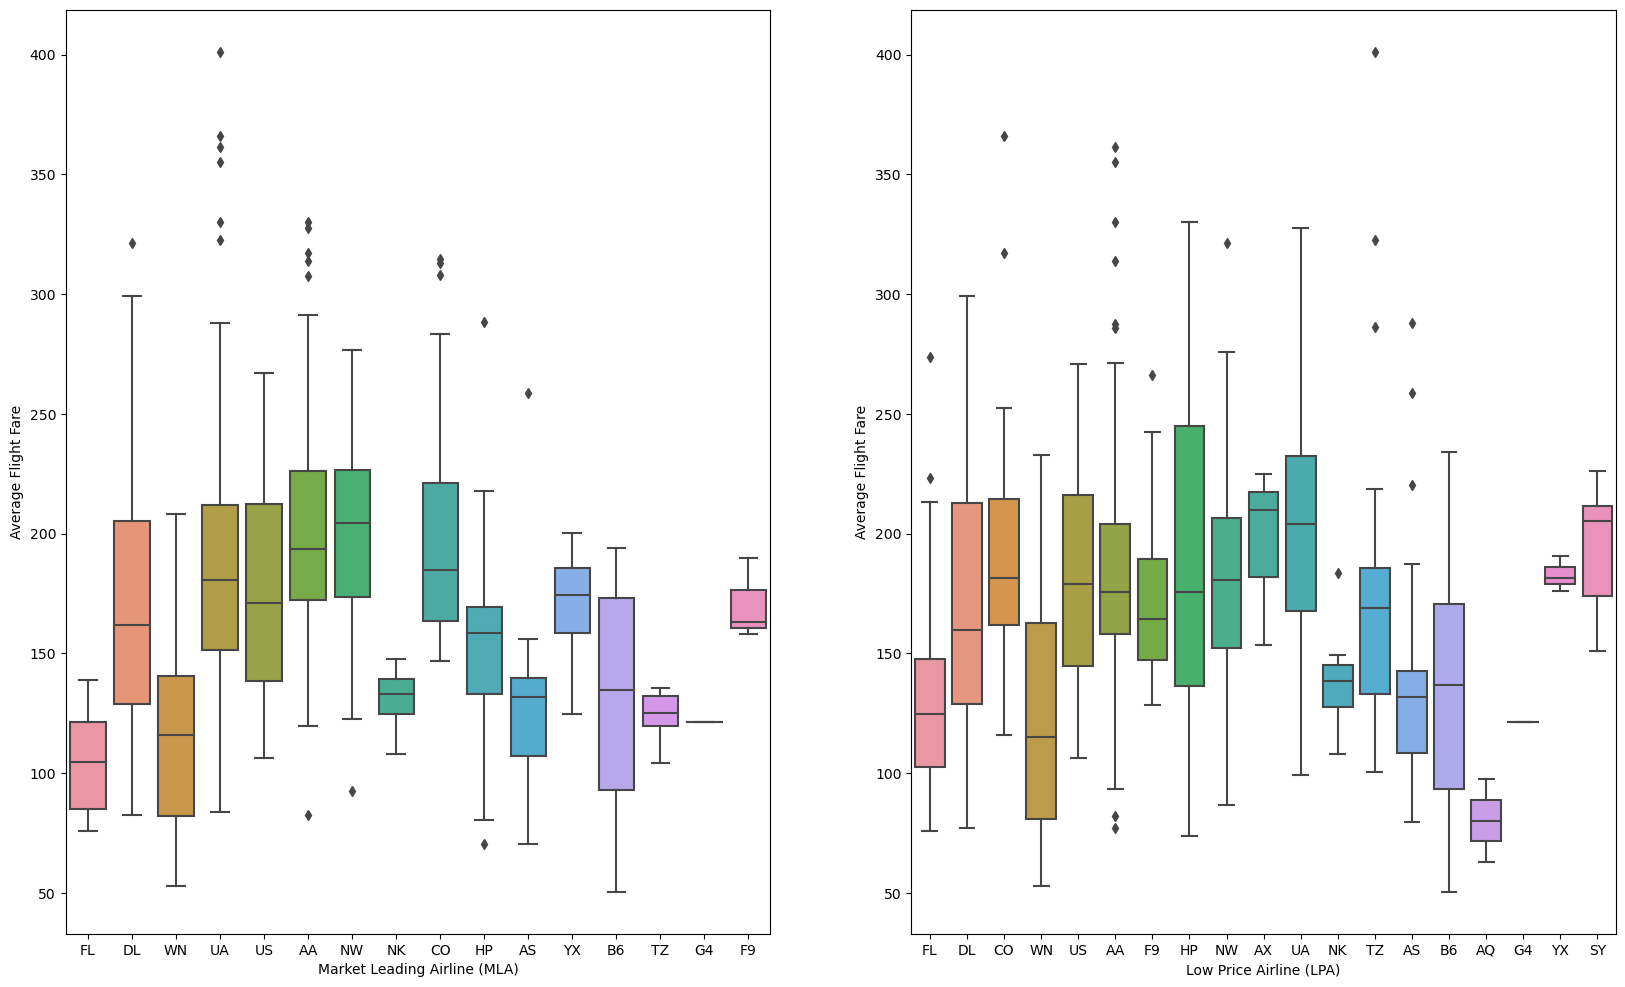

In [18]:
# Let us check with conditional boxplot to understand the relation better
plt.figure(figsize = (20, 12))
plt.subplot(1,2,1)
sns.boxplot(x = 'Market Leading Airline (MLA)', y = 'Average Flight Fare', data = data)
plt.subplot(1,2,2)
sns.boxplot(x = 'Low Price Airline (LPA)', y = 'Average Flight Fare', data = data)
plt.show()

- Most flights have comparable median flight fare with some having very low values.
- Flight fare of market leading airline and Low Price airline seem to fall in similar range.

### 5.Multivariate Plot and Scatter Plot

### Q5. Pair PLOT

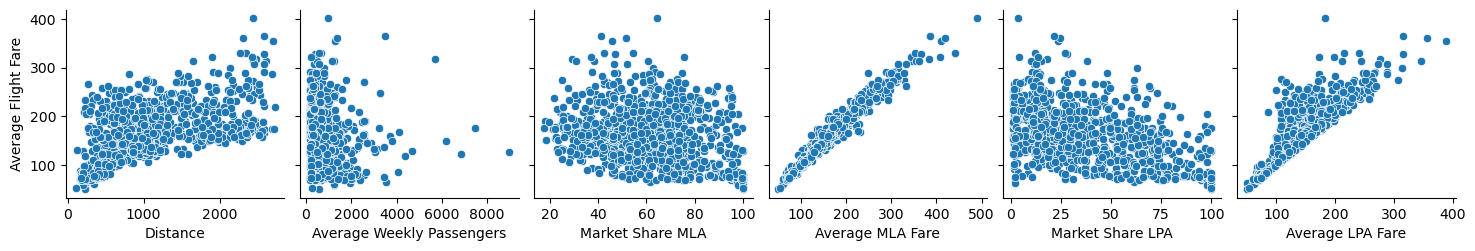

In [19]:
sns.pairplot(data, y_vars = 'Average Flight Fare', x_vars = ["Distance", "Average Weekly Passengers",'Market Share MLA',
                                                             'Average MLA Fare','Market Share LPA','Average LPA Fare'])
plt.show()

- Average Flight fare is most corelated to fare of market leader and low performing flight with mild corelation with Distance as well.

- Variabes need to be scaled before further analysis . Transformation seems unnecessary as most data points don't show any clear trend with Average flight Fare. Still checkking effect of log transformation on the data set.

In [20]:
# Log Transformation of independent variables
D1 = np.log(data['Distance'])
D2 = np.log(data['Average Weekly Passengers'])
D3 = np.log(data['Market Share MLA'])
D4 = np.log(data['Average MLA Fare'])
D5 = np.log(data['Market Share LPA'])
D6 = np.log(data['Average LPA Fare'])

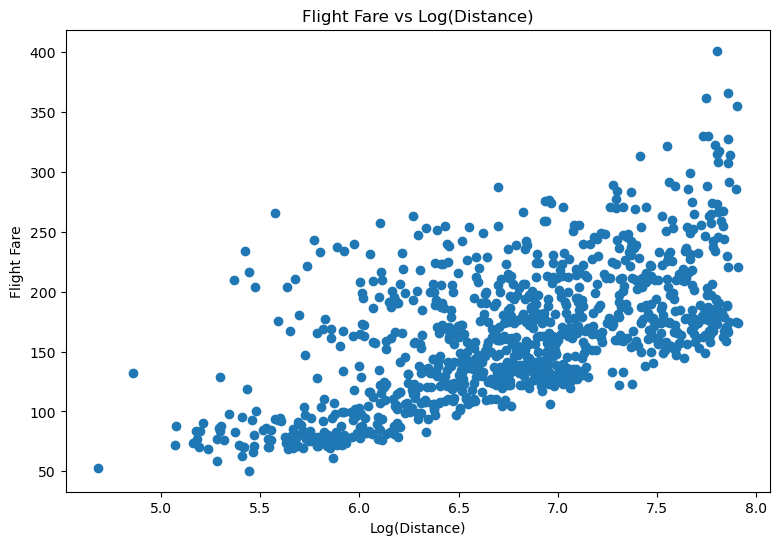

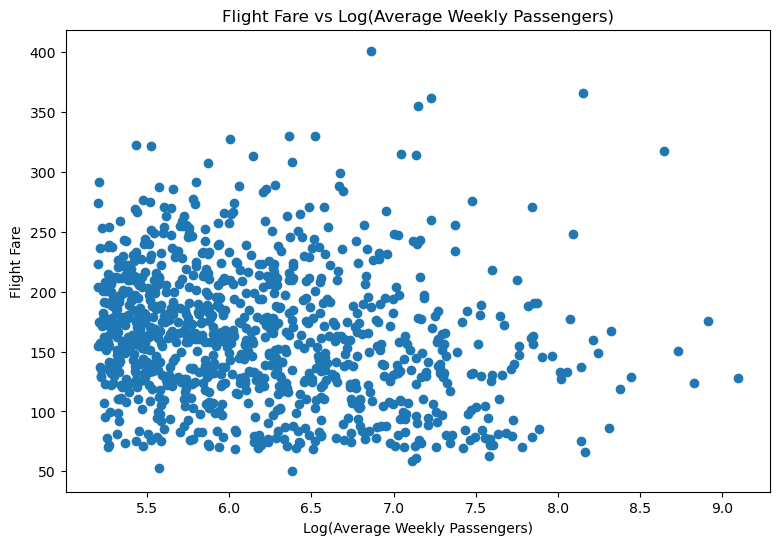

In [21]:
plt.figure(figsize = (20,6))
plt.subplot(1, 2, 1)
plt.title('Flight Fare vs Log(Distance)')
plt.scatter( D1, data['Average Flight Fare'])
plt.xlabel('Log(Distance)')
plt.ylabel('Flight Fare')


plt.figure(figsize = (20,6))
plt.subplot(1, 2, 2)
plt.title('Flight Fare vs Log(Average Weekly Passengers)')
plt.scatter( D2, data['Average Flight Fare'])
plt.xlabel('Log(Average Weekly Passengers)')
plt.ylabel('Flight Fare')
plt.show()

### Inference:
- Given Transformation does'nt seem to be adding much value, so raw data to be used for further analysis


### 6. Multi Linear Regression Model 

In [22]:
data.drop(['City1'], axis = 1, inplace = True)
data.drop(['City2'], axis = 1, inplace = True)
data.drop(['Market Leading Airline (MLA)'], axis = 1, inplace = True)
data.drop(['Low Price Airline (LPA)'], axis = 1, inplace = True)

### 6.1 Rescaling the Features

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler = MinMaxScaler()

In [25]:
# Apply scaler() to all the columns except the 'dummy' variables
variables = ['Average Flight Fare', 'Distance', 'Average Weekly Passengers', 'Market Share MLA', 
        'Average MLA Fare','Market Share LPA', 'Average LPA Fare']

data[variables] = scaler.fit_transform(data[variables])

In [26]:
data.head()

,Average Flight Fare,Distance,Average Weekly Passengers,Market Share MLA,Average MLA Fare,Market Share LPA,Average LPA Fare
0,0.182344,0.160550,0.027727,0.637877,0.137676,0.698706,0.181539
1,0.205155,0.287462,0.010882,0.697522,0.165116,0.163432,0.204918
2,0.467338,0.284404,0.003917,0.743562,0.394667,0.017283,0.347324
3,0.053834,0.068807,0.048513,0.963192,0.041728,0.969375,0.056897
4,0.306835,0.235092,0.015010,0.268586,0.252190,0.144330,0.283185


In [27]:
data.describe()

,Average Flight Fare,Distance,Average Weekly Passengers,Market Share MLA,Average MLA Fare,Market Share LPA,Average LPA Fare
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.321791,0.362757,0.055976,0.515653,0.264221,0.338503,0.276603
std,0.157867,0.245873,0.087409,0.235274,0.142568,0.273873,0.139595
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.215149,0.170298,0.008642,0.350219,0.167380,0.122650,0.189630
50%,0.316002,0.310015,0.025472,0.504859,0.252281,0.253487,0.260737
75%,0.418786,0.513953,0.067109,0.678207,0.346881,0.524687,0.351491
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 6.2. Splitting Data into Training and Test

In [28]:
## Splitting the dataset.
np.random.seed(0)

from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [29]:
y_train = data_train.pop('Average Flight Fare')
X_train = data_train

In [30]:
y_test = data_test.pop('Average Flight Fare')
X_test = data_test

### 6.3. Fitting Regression Model

In [31]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr_model = lr.fit(X_train, y_train)
lr_model.coef_

array([ 0.01608207, -0.01847207,  0.01984823,  0.88350961, -0.02116117,
        0.21999856])

In [32]:
print(lr_model.score(X_train, y_train))
print(lr_model.score(X_test, y_test))

0.9734680065850925
0.9756468855793664


In [33]:
# Model Prediction

y_pred = lr_model.predict(X_test)

# Taking the inverse transform the predicted data
#y_predict_orig = scaler.inverse_transform(y_pred)
#y_test_orig = scaler.inverse_transform(y_test)

In [34]:
k = X_test.shape[1]
n = len(X_test)

In [35]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_pred)),'.3f'))
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 0.025 
MSE = 0.0006235276486579622 
MAE = 0.017816194523768373 
R2 = 0.9756468855793664 
Adjusted R2 = 0.975148186990548


### Conclusions Drawn:

### Insights from Exploratory Data Analysis (EDA):

- A significant portion of flight fares is concentrated between 100 to 300, occasionally displaying outliers.
- Distances traveled by flights generally span from 500 to 2500.
- While the average weekly passenger count often remains below 2000, a considerable number of outliers are present.
- Both the Market Leader and Low Price Airline exhibit fare ranges of 100 to 300, showcasing some outliers.
- The Market Leader maintains a market share of 40 to 80 percent on most routes, whereas the Low Price Airline tends to have a market share below 40 percent on the majority of routes.
- Most flights display comparable median flight fares, though some have notably lower values.
- The flight fares of the leading market airline and the Low Price airline seem to fall within a similar range.

### Observations from Model Performance Scores:

- The model's performance has significantly improved.
- All the losses are minimized, and the R2 and Adjusted R2 scores approach a value of 1.
